In [10]:
import pandas as pd
import numpy as np
import geopandas as gpd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

### Read Files

In [4]:
accident = pd.read_csv("D:\My Python Projects\All-Big-Raw-Data\ITS\Accident.csv")
accident

,Accident_Index,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),...,Speed_limit,Junction_Control,Unnamed: 16,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident
0,201201BS70001,-0.169101,51.493429,3,2,1,19/01/2012,5,20:35,12,...,30,Automatic traffic signal,NaN,None within 50 metres,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
1,201201BS70002,-0.200838,51.517931,3,2,1,4/1/2012,4,17:00,1,...,30,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
2,201201BS70003,-0.188636,51.487618,3,2,1,10/1/2012,3,10:07,12,...,30,Giveway or uncontrolled,NaN,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1,Yes
3,201201BS70004,-0.200259,51.514325,3,1,1,18/01/2012,4,12:20,12,...,30,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1,Yes
4,201201BS70005,-0.183773,51.497614,3,1,1,17/01/2012,3,20:24,12,...,30,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464692,2.01E+12,-3.417278,55.264773,2,2,1,7/12/2014,1,22:20,917,...,70,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Snowing without high winds,Snow,2,Yes
464693,2.01E+12,-3.230255,55.054855,3,2,2,11/12/2014,5,06:40,917,...,70,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Snow,2,Yes
464694,2.01E+12,-3.230826,54.985668,3,1,1,9/12/2014,3,02:00,917,...,40,NaN,NaN,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Frost/Ice,2,Yes
464695,2.01E+12,-3.191397,54.990446,2,3,2,17/12/2014,4,06:55,917,...,60,Giveway or uncontrolled,NaN,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining without high winds,Wet/Damp,2,Yes


In [5]:
# max(accident["Accident_Severity"]) , min(accident["Accident_Severity"])
max(accident["Number_of_Vehicles"]), min(accident["Number_of_Vehicles"])
# max(accident["Number_of_Casualties"]) , min(accident["Number_of_Casualties"])

(67, 1)

In [6]:
district = gpd.read_file("D:\My Python Projects\Machine-Learning\ITS\HW\HW1\Datasets_HW1\district.json")
district

,id,LAD13CD,LAD13CDO,LAD13NM,LAD13NMW,geometry
0,E06000001,E06000001,00EB,Hartlepool,NaN,"MULTIPOLYGON (((-1.24244 54.72219, -1.24162 54..."
1,E06000002,E06000002,00EC,Middlesbrough,NaN,"MULTIPOLYGON (((-1.19744 54.58184, -1.19416 54..."
2,E06000003,E06000003,00EE,Redcar and Cleveland,NaN,"MULTIPOLYGON (((-1.20071 54.57768, -1.19989 54..."
3,E06000004,E06000004,00EF,Stockton-on-Tees,NaN,"MULTIPOLYGON (((-1.28171 54.56460, -1.27762 54..."
4,E06000005,E06000005,00EH,Darlington,NaN,"POLYGON ((-1.43800 54.59493, -1.43554 54.59552..."
...,...,...,...,...,...,...
321,E09000029,E09000029,00BF,Sutton,NaN,"POLYGON ((-0.13456 51.39073, -0.13292 51.39013..."
322,E09000030,E09000030,00BG,Tower Hamlets,NaN,"POLYGON ((-0.01673 51.54356, -0.01591 51.54237..."
323,E09000031,E09000031,00BH,Waltham Forest,NaN,"POLYGON ((0.02172 51.62861, 0.02091 51.62920, ..."
324,E09000032,E09000032,00BJ,Wandsworth,NaN,"POLYGON ((-0.14028 51.41927, -0.14438 51.41749..."


<Axes: >

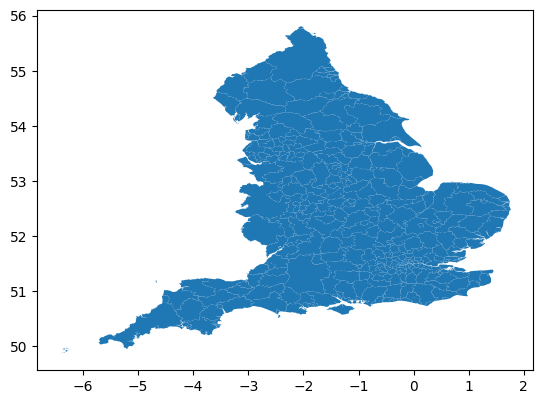

In [7]:
district.plot()

<Axes: >

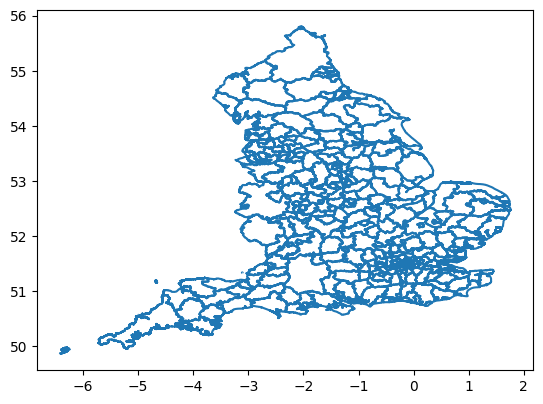

In [8]:
district.boundary.plot()

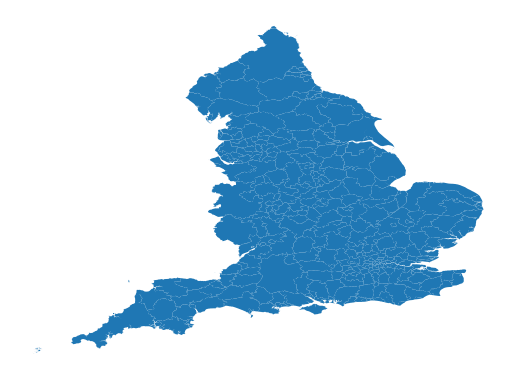

In [9]:
ax = district.plot()
ax.set_axis_off()

### Part 1

In [13]:
new_df = accident[["Longitude", "Latitude"]].copy()
scaler = StandardScaler()
for column in ["Accident_Severity", "Number_of_Vehicles", "Number_of_Casualties"]:
    new_df[column] = scaler.fit_transform(accident[[column]])

weight_severity = -0.5  # the weight is negative because the worst is 1 and the best is 3
weight_vehicles = 0.15
weight_casualties = 0.25
# the bigger the weighed_sum, the more dangerous the location
weighted_sum = (new_df["Accident_Severity"] * weight_severity) + (new_df["Number_of_Vehicles"] * weight_vehicles) + (
        new_df["Number_of_Casualties"] * weight_casualties)
new_df = new_df.assign(Weighted_Sum=weighted_sum)
new_df

,Longitude,Latitude,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Weighted_Sum
0,-0.169101,51.493429,0.414246,0.242576,-0.407310,-0.272564
1,-0.200838,51.517931,0.414246,0.242576,-0.407310,-0.272564
2,-0.188636,51.487618,0.414246,0.242576,-0.407310,-0.272564
3,-0.200259,51.514325,0.414246,-1.168454,-0.407310,-0.484218
4,-0.183773,51.497614,0.414246,-1.168454,-0.407310,-0.484218
...,...,...,...,...,...,...
464692,-3.417278,55.264773,-2.073140,0.242576,-0.407310,0.971129
464693,-3.230255,55.054855,0.414246,0.242576,0.810649,0.031926
464694,-3.230826,54.985668,0.414246,-1.168454,-0.407310,-0.484218
464695,-3.191397,54.990446,-2.073140,1.653606,0.810649,1.487273


In [36]:
slice_ = np.linspace(new_df["Weighted_Sum"].min(), new_df["Weighted_Sum"].max(), 5)
slice_

array([-0.48421843,  8.57145156, 17.62712155, 26.68279153, 35.73846152])

C:\Users\Nassrin Sharifi\AppData\Local\Temp\ipykernel_16208\2999666992.py:25: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  points3_df.plot(ax=ax, markersize=10, color='orange', alpha=1)


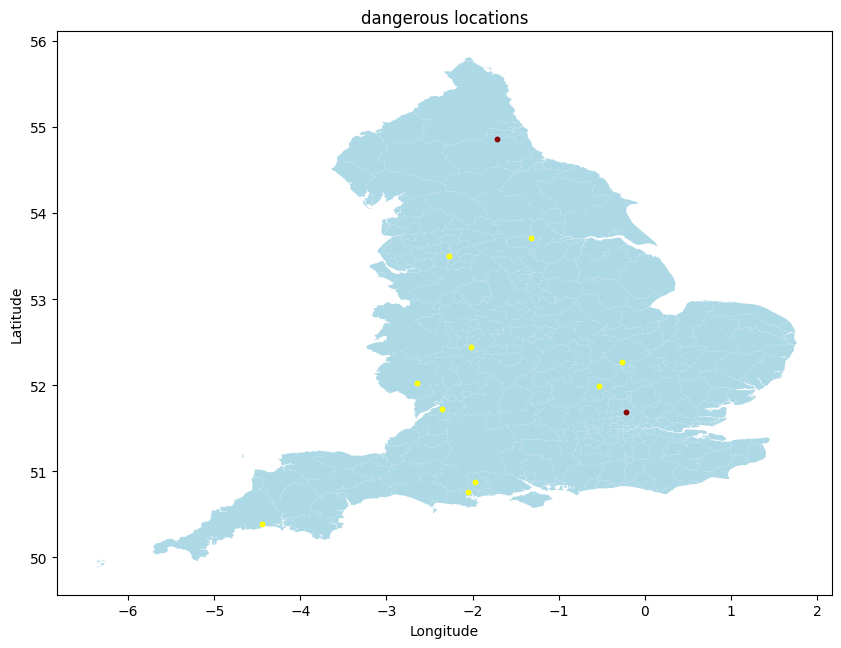

In [42]:
#dividing points into 4 groups: safe(green),  almost dangerous(yellow), dangerous(orange), highly dangerous(darkred)
mask1 = ((slice[0] <= new_df["Weighted_Sum"]).astype(int) + (new_df["Weighted_Sum"] < slice[1]).astype(int)) == 2
mask2 = ((slice[1] <= new_df["Weighted_Sum"]).astype(int) + (new_df["Weighted_Sum"] < slice[2]).astype(int)) == 2
mask3 = ((slice[2] <= new_df["Weighted_Sum"]).astype(int) + (new_df["Weighted_Sum"] < slice[3]).astype(int)) == 2
mask4 = slice[3] <= new_df["Weighted_Sum"]

points1_df = gpd.GeoDataFrame(new_df[mask1],
                              geometry=gpd.points_from_xy(new_df[mask1]['Longitude'], new_df[mask1]['Latitude']))
points2_df = gpd.GeoDataFrame(new_df[mask2],
                              geometry=gpd.points_from_xy(new_df[mask2]['Longitude'], new_df[mask2]['Latitude']))
points3_df = gpd.GeoDataFrame(new_df[mask3],
                              geometry=gpd.points_from_xy(new_df[mask3]['Longitude'], new_df[mask3]['Latitude']))
points4_df = gpd.GeoDataFrame(new_df[mask4],
                              geometry=gpd.points_from_xy(new_df[mask4]['Longitude'], new_df[mask4]['Latitude']))
points1_df = gpd.sjoin(points1_df, district, predicate="within")
points2_df = gpd.sjoin(points2_df, district, predicate="within")
points3_df = gpd.sjoin(points3_df, district, predicate="within")
points4_df = gpd.sjoin(points4_df, district, predicate="within")
# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))
district.plot(ax=ax, color='lightblue')
# Scatter plot the locations on the map
# points1_df.plot(ax=ax, markersize=10, color='green', alpha=1)
points2_df.plot(ax=ax, markersize=10, color='yellow', alpha=1)
points3_df.plot(ax=ax, markersize=10, color='orange', alpha=1)
points4_df.plot(ax=ax, markersize=10, color='darkred', alpha=1)
plt.savefig("dangerous locations")
ax.set_title("dangerous locations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()